In [4]:
import pandas
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
np.empty((2,4))

array([[0.0e+000, 4.9e-324, 9.9e-324, 1.5e-323],
       [2.0e-323, 2.5e-323, 3.0e-323, 3.5e-323]])

In [39]:
def assign_and_preprocess_jets(jets,numpointstot = 1000,unflatten=True,flattenpoints=True):
    if flattenpoints:
        pointslist = np.empty((len(jets),numpointstot*2))
    else:
        pointslist = np.empty((len(jets),numpointstot,2))
    for i, jet in enumerate(jets):
        if unflatten:
            jet = jet[:800].reshape(200,4)
            jet = jet[np.all(jet != 0, axis=1)]
        jet = preprocess_jet(jet)

        if flattenpoints:
            pointslist[i] = assignpoints(jet,numpointstot).flatten()
        else:
            pointslist[i] = assignpoints(jet,numpointstot)
        
    return pointslist
        

def preprocess_jet(jet):

    jetsum = np.sum(jet,axis=0)

    beta = jetsum[3]/jetsum[0]
    gamma = 1/(1 - beta**2)**0.5
    longboostmat = np.array([[gamma, 0, 0, -gamma*beta],
                             [0,1,0,0],
                             [0,0,1,0],
                             [-gamma*beta,0,0,gamma]])
    pt = np.linalg.norm(jetsum[1:3])
    stheta = jetsum[2]/pt
    ctheta = jetsum[1]/pt
    rotmat = np.array([[1,0,0,0],
                       [0,ctheta,stheta,0],
                       [0,-stheta,ctheta,0],
                       [0,0,0,1]])

    jet = np.matmul(rotmat,np.matmul(longboostmat,jet.T)).T

    phi = np.arctan2(jet[:,2],jet[:,1])
    eta = np.log((jet[:,0]+jet[:,3])/(jet[:,0]-jet[:,3]))
    jet[:,2] = phi
    jet[:,3] = eta
    
    if len(jet) == 1:
        return jet

    pca = PCA()
    myfit = pca.fit(jet[:,2:])
    extrarotate = np.matrix([[0, -1], [1, 0]])

    principal_rotate = np.diag(np.ones(4))
    principal_rotate[2:,2:] = np.dot(extrarotate,pca.components_)
    jet = np.matmul(principal_rotate,jet.T).T

    quadrants = np.array([(jet[:,3]>0)*(jet[:,2]>0),
                          (jet[:,3]>0)*(jet[:,2]<0),
                          (jet[:,3]<0)*(jet[:,2]<0),
                          (jet[:,3]<0)*(jet[:,2]>0)])
    
    maxquadrant = np.argmax([np.sum(jet[quadrant,0]) for quadrant in quadrants])
    
    if maxquadrant >= 2:
        jet[:,3] = - jet[:,3]
    if maxquadrant > 0 and maxquadrant < 3:
        jet[:,2] = - jet[:,2]
        
    return jet

def assignpoints(jet,numpointstot = 1000):
    Ejet = np.sum(jet[:,0])
    numpointslist = np.floor_divide(jet[:,0],Ejet/numpointstot)
    numassigned = int(np.sum(numpointslist))
    
    if numassigned < numpointstot:
        remainders = np.remainder(jet[:,0],Ejet/numpointstot)

        extra_args = np.argsort(remainders)[-(numpointstot-numassigned):]
        numpointslist[extra_args] = numpointslist[extra_args]+1

    pointsarray = np.zeros((0,2))
    for i, particle in enumerate(jet):
        newpoints = np.ones((int(numpointslist[i]),2))
        newpoints[:,0] = newpoints[:,0]*particle[2]
        newpoints[:,1] = newpoints[:,1]*particle[3]
        pointsarray = np.append(pointsarray,newpoints,axis=0)
        
    return pointsarray

In [6]:
numpointstot = 1000
columns = np.array([])
for i in range(numpointstot):
    columns = np.append(columns,str(i) + 'x')
    columns = np.append(columns,str(i) + 'y')

In [50]:
outstore.select("points")

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,995x,995y,996x,996y,997x,997y,998x,998y,999x,999y
0,0.016297,0.005630,0.016297,0.005630,0.016297,0.005630,0.016297,0.005630,0.016297,0.005630,...,-0.138620,-0.547267,-0.200841,-0.555093,-0.200841,-0.555093,-0.134106,1.087150,0.306776,-0.280818
1,-0.004229,-0.053715,-0.004229,-0.053715,-0.004229,-0.053715,-0.004229,-0.053715,-0.004229,-0.053715,...,-0.235846,-0.842961,0.165531,-1.225609,0.042501,-0.385901,-0.152534,0.308523,-0.301335,-1.268270
2,0.011950,0.116840,0.011950,0.116840,0.011950,0.116840,0.011950,0.116840,0.011950,0.116840,...,-0.158739,-0.301892,-0.411297,-1.024364,0.362356,-0.114288,0.133677,-1.199964,0.350768,-0.612749
3,-0.007290,-0.006625,-0.007290,-0.006625,-0.007290,-0.006625,-0.007290,-0.006625,-0.007290,-0.006625,...,-0.069633,-1.023864,-0.069633,-1.023864,-0.277679,-0.321687,0.258084,-0.168483,0.083917,1.157454
4,0.045045,0.036515,0.045045,0.036515,0.045045,0.036515,0.045045,0.036515,0.045045,0.036515,...,0.157191,1.160257,-0.104860,0.045243,0.064693,-0.489289,-0.041075,-1.181137,0.026690,-1.195858
5,0.014067,0.075823,0.014067,0.075823,0.014067,0.075823,0.014067,0.075823,0.014067,0.075823,...,-0.624745,0.670481,-0.543790,0.204090,0.434372,-1.228487,-0.477254,-0.717536,-0.558188,-0.880737
6,-0.026958,-0.468123,-0.026958,-0.468123,-0.026958,-0.468123,-0.026958,-0.468123,-0.026958,-0.468123,...,-0.141758,0.647736,-0.424733,0.647421,-0.706555,0.410997,0.199823,0.342693,-0.197886,0.637462
7,0.140729,0.029408,0.140729,0.029408,0.140729,0.029408,0.140729,0.029408,0.140729,0.029408,...,-0.109708,-0.143405,0.102364,-0.849382,-0.797245,-0.414010,-0.385007,-1.356197,-0.260835,-0.147478
8,0.006316,0.005413,0.006316,0.005413,0.006316,0.005413,0.006316,0.005413,0.006316,0.005413,...,0.036481,1.246718,0.036481,1.246718,0.351408,-0.746465,0.534327,0.387996,-0.459956,0.198721
9,0.098921,0.344981,0.098921,0.344981,0.098921,0.344981,0.098921,0.344981,0.098921,0.344981,...,0.428561,0.862518,-0.644639,0.902209,0.353046,0.649992,0.098587,-0.144442,0.308724,0.832725


In [46]:
import time

input_filename = "/data1/users/jcollins/Heidelberg_sample/train.h5"
store = pandas.HDFStore(input_filename,mode='r')

numpointstot = 1000
columns = np.array([])
for i in range(numpointstot):
    columns = np.append(columns,str(i) + 'x')
    columns = np.append(columns,str(i) + 'y')

#outstore = pandas.HDFStore("/data1/users/jcollins/Heidelberg_sample/train_points.h5")

In [47]:
start = time.time()
int_time= start
nmax = 500000
chunksize = 1000
numchunks = nmax / chunksize
outstore = pandas.HDFStore("/data1/users/jcollins/Heidelberg_sample/train_points.h5")

jet_iter = store.select("table",iterator=True,chunksize=chunksize,stop=nmax)

for i, chunk in enumerate(jet_iter):
    
    if (i*chunksize)%(nmax/100) == 0:
        print i, time.time() - int_time
        int_time= time.time()
    if i > numchunks:
        break

    pointsarrays = assign_and_preprocess_jets(chunk.values,numpointstot = 1000)
    dictionary = dict(zip(columns, pointsarrays.T))
    out_df = pd.DataFrame(dictionary,columns=columns)
    outstore.append('points',out_df)
    
print time.time()-start

0 0.0224578380585
5 5.74179911613
10 5.79319000244
15 5.8024020195
20 5.97759485245
25 6.0812959671
30 6.15750598907
35 6.3108959198
40 6.45045590401
45 6.51511907578
50 6.6501288414
55 6.84051799774
60 6.83591294289
65 7.0377600193
70 6.98728322983
75 7.13597011566
80 7.26289486885
85 7.3580930233
90 7.4745631218
95 7.57091593742
100 7.70859003067
105 7.8119699955
110 7.91279602051
115 8.00131607056
120 8.13477301598
125 8.30352902412
130 8.35303997993
135 6.75221991539
140 5.72371697426
145 5.85443210602
150 5.97281384468
155 6.1428258419
160 6.19443798065
165 6.32032704353
170 6.38543701172
175 6.52038407326
180 6.62814021111
185 6.75664496422
190 6.83087587357
195 6.94389414787
200 7.07910084724
205 7.14956402779
210 7.30863809586
215 7.43453383446
220 7.46781015396
225 7.64456892014
230 7.71126508713
235 7.79976892471
240 8.05931997299
245 8.01364302635
250 8.15397405624
255 8.28862595558
260 8.34490513802
265 7.30315303802
270 5.69762992859
275 5.7968518734
280 5.86084103584
285 

In [50]:
out_df.to_hdf("/data1/users/jcollins/Heidelberg_sample/train_points_2.h5", "points")

MemoryError: 

In [51]:
outstore = pandas.HDFStore("/data1/users/jcollins/Heidelberg_sample/train_points_2.h5")
outstore.put("points",out_df)

MemoryError: 

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,995x,995y,996x,996y,997x,997y,998x,998y,999x,999y
0,0.016297,0.005630,0.016297,0.005630,0.016297,0.005630,0.016297,0.005630,0.016297,0.005630,...,-0.138620,-0.547267,-0.200841,-0.555093,-0.200841,-0.555093,-0.134106,1.087150,0.306776,-0.280818
1,-0.004229,-0.053715,-0.004229,-0.053715,-0.004229,-0.053715,-0.004229,-0.053715,-0.004229,-0.053715,...,-0.235846,-0.842961,0.165531,-1.225609,0.042501,-0.385901,-0.152534,0.308523,-0.301335,-1.268270
2,0.011950,0.116840,0.011950,0.116840,0.011950,0.116840,0.011950,0.116840,0.011950,0.116840,...,-0.158739,-0.301892,-0.411297,-1.024364,0.362356,-0.114288,0.133677,-1.199964,0.350768,-0.612749
3,-0.007290,-0.006625,-0.007290,-0.006625,-0.007290,-0.006625,-0.007290,-0.006625,-0.007290,-0.006625,...,-0.069633,-1.023864,-0.069633,-1.023864,-0.277679,-0.321687,0.258084,-0.168483,0.083917,1.157454
4,0.045045,0.036515,0.045045,0.036515,0.045045,0.036515,0.045045,0.036515,0.045045,0.036515,...,0.157191,1.160257,-0.104860,0.045243,0.064693,-0.489289,-0.041075,-1.181137,0.026690,-1.195858
5,0.014067,0.075823,0.014067,0.075823,0.014067,0.075823,0.014067,0.075823,0.014067,0.075823,...,-0.624745,0.670481,-0.543790,0.204090,0.434372,-1.228487,-0.477254,-0.717536,-0.558188,-0.880737
6,-0.026958,-0.468123,-0.026958,-0.468123,-0.026958,-0.468123,-0.026958,-0.468123,-0.026958,-0.468123,...,-0.141758,0.647736,-0.424733,0.647421,-0.706555,0.410997,0.199823,0.342693,-0.197886,0.637462
7,0.140729,0.029408,0.140729,0.029408,0.140729,0.029408,0.140729,0.029408,0.140729,0.029408,...,-0.109708,-0.143405,0.102364,-0.849382,-0.797245,-0.414010,-0.385007,-1.356197,-0.260835,-0.147478
8,0.006316,0.005413,0.006316,0.005413,0.006316,0.005413,0.006316,0.005413,0.006316,0.005413,...,0.036481,1.246718,0.036481,1.246718,0.351408,-0.746465,0.534327,0.387996,-0.459956,0.198721
9,0.098921,0.344981,0.098921,0.344981,0.098921,0.344981,0.098921,0.344981,0.098921,0.344981,...,0.428561,0.862518,-0.644639,0.902209,0.353046,0.649992,0.098587,-0.144442,0.308724,0.832725


In [40]:
assignpoints(preprocess_jet(jet))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [15]:
out_df

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,995x,995y,996x,996y,997x,997y,998x,998y,999x,999y
0,0.016297,0.005630,0.016297,0.005630,0.016297,0.005630,0.016297,0.005630,0.016297,0.005630,...,-0.138620,-0.547267,-0.200841,-0.555093,-0.200841,-0.555093,-0.134106,1.087150,0.306776,-0.280818
1,-0.004229,-0.053715,-0.004229,-0.053715,-0.004229,-0.053715,-0.004229,-0.053715,-0.004229,-0.053715,...,-0.235846,-0.842961,0.165531,-1.225609,0.042501,-0.385901,-0.152534,0.308523,-0.301335,-1.268270
2,0.011950,0.116840,0.011950,0.116840,0.011950,0.116840,0.011950,0.116840,0.011950,0.116840,...,-0.158739,-0.301892,-0.411297,-1.024364,0.362356,-0.114288,0.133677,-1.199964,0.350768,-0.612749
3,-0.007290,-0.006625,-0.007290,-0.006625,-0.007290,-0.006625,-0.007290,-0.006625,-0.007290,-0.006625,...,-0.069633,-1.023864,-0.069633,-1.023864,-0.277679,-0.321687,0.258084,-0.168483,0.083917,1.157454
4,0.045045,0.036515,0.045045,0.036515,0.045045,0.036515,0.045045,0.036515,0.045045,0.036515,...,0.157191,1.160257,-0.104860,0.045243,0.064693,-0.489289,-0.041075,-1.181137,0.026690,-1.195858
5,0.014067,0.075823,0.014067,0.075823,0.014067,0.075823,0.014067,0.075823,0.014067,0.075823,...,-0.624745,0.670481,-0.543790,0.204090,0.434372,-1.228487,-0.477254,-0.717536,-0.558188,-0.880737
6,-0.026958,-0.468123,-0.026958,-0.468123,-0.026958,-0.468123,-0.026958,-0.468123,-0.026958,-0.468123,...,-0.141758,0.647736,-0.424733,0.647421,-0.706555,0.410997,0.199823,0.342693,-0.197886,0.637462
7,0.140729,0.029408,0.140729,0.029408,0.140729,0.029408,0.140729,0.029408,0.140729,0.029408,...,-0.109708,-0.143405,0.102364,-0.849382,-0.797245,-0.414010,-0.385007,-1.356197,-0.260835,-0.147478
8,0.006316,0.005413,0.006316,0.005413,0.006316,0.005413,0.006316,0.005413,0.006316,0.005413,...,0.036481,1.246718,0.036481,1.246718,0.351408,-0.746465,0.534327,0.387996,-0.459956,0.198721
9,0.098921,0.344981,0.098921,0.344981,0.098921,0.344981,0.098921,0.344981,0.098921,0.344981,...,0.428561,0.862518,-0.644639,0.902209,0.353046,0.649992,0.098587,-0.144442,0.308724,0.832725


In [6]:
out_df

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,995x,995y,996x,996y,997x,997y,998x,998y,999x,999y
0,0.016297,0.005630,0.016297,0.005630,0.016297,0.005630,0.016297,0.005630,0.016297,0.005630,...,-0.138620,-0.547267,-0.200841,-0.555093,-0.200841,-0.555093,-0.134106,1.087150,0.306776,-0.280818
1,-0.004229,-0.053715,-0.004229,-0.053715,-0.004229,-0.053715,-0.004229,-0.053715,-0.004229,-0.053715,...,-0.235846,-0.842961,0.165531,-1.225609,0.042501,-0.385901,-0.152534,0.308523,-0.301335,-1.268270
2,0.011950,0.116840,0.011950,0.116840,0.011950,0.116840,0.011950,0.116840,0.011950,0.116840,...,-0.158739,-0.301892,-0.411297,-1.024364,0.362356,-0.114288,0.133677,-1.199964,0.350768,-0.612749
3,-0.007290,-0.006625,-0.007290,-0.006625,-0.007290,-0.006625,-0.007290,-0.006625,-0.007290,-0.006625,...,-0.069633,-1.023864,-0.069633,-1.023864,-0.277679,-0.321687,0.258084,-0.168483,0.083917,1.157454
4,0.045045,0.036515,0.045045,0.036515,0.045045,0.036515,0.045045,0.036515,0.045045,0.036515,...,0.157191,1.160257,-0.104860,0.045243,0.064693,-0.489289,-0.041075,-1.181137,0.026690,-1.195858
5,0.014067,0.075823,0.014067,0.075823,0.014067,0.075823,0.014067,0.075823,0.014067,0.075823,...,-0.624745,0.670481,-0.543790,0.204090,0.434372,-1.228487,-0.477254,-0.717536,-0.558188,-0.880737
6,-0.026958,-0.468123,-0.026958,-0.468123,-0.026958,-0.468123,-0.026958,-0.468123,-0.026958,-0.468123,...,-0.141758,0.647736,-0.424733,0.647421,-0.706555,0.410997,0.199823,0.342693,-0.197886,0.637462
7,0.140729,0.029408,0.140729,0.029408,0.140729,0.029408,0.140729,0.029408,0.140729,0.029408,...,-0.109708,-0.143405,0.102364,-0.849382,-0.797245,-0.414010,-0.385007,-1.356197,-0.260835,-0.147478
8,0.006316,0.005413,0.006316,0.005413,0.006316,0.005413,0.006316,0.005413,0.006316,0.005413,...,0.036481,1.246718,0.036481,1.246718,0.351408,-0.746465,0.534327,0.387996,-0.459956,0.198721
9,0.098921,0.344981,0.098921,0.344981,0.098921,0.344981,0.098921,0.344981,0.098921,0.344981,...,0.428561,0.862518,-0.644639,0.902209,0.353046,0.649992,0.098587,-0.144442,0.308724,0.832725


In [8]:
preprocess_jet(jet)

array([[5.91882142e+02, 5.91882163e+02, 4.80192025e-17, 0.00000000e+00]])

In [172]:
jet

array([[ 719.51837158, -547.96209717,  223.74546814,  409.12371826]])

In [169]:
extrarotate

NameError: name 'extrarotate' is not defined

In [32]:
pointsarray.flatten()

array([ 0.01629732,  0.00562966,  0.01629732, ...,  1.08715017,
        0.30677634, -0.28081843])

In [ ]:
for index, row in df.iterrows():
    jet = jets_df.sample().values[0,:800].reshape(200,4)

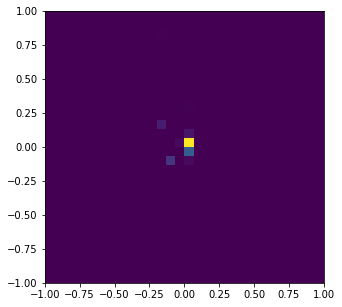

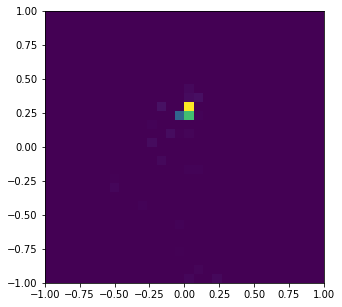

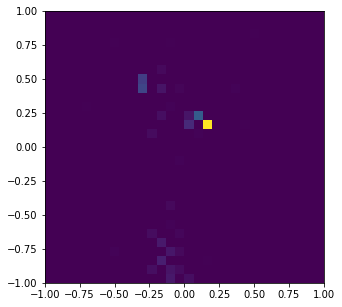

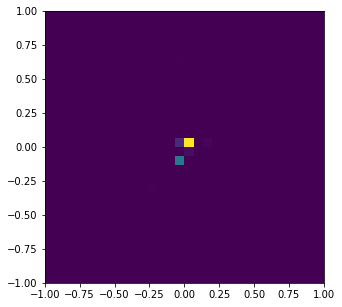

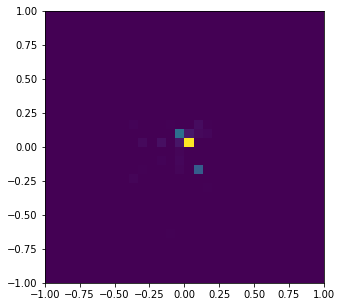

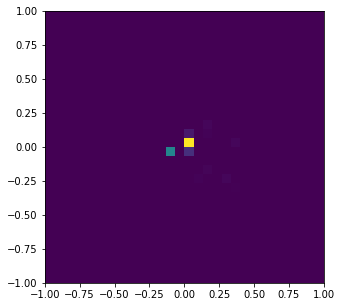

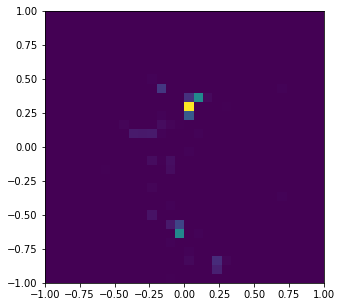

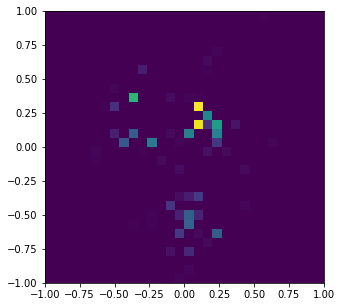

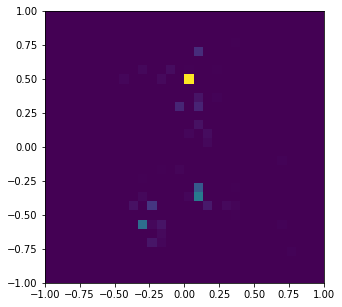

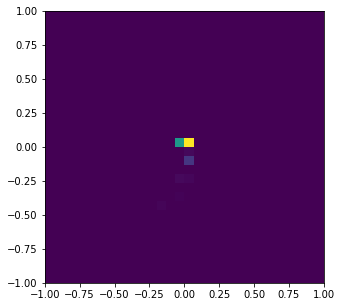

In [311]:
for i in range(10):
    jet = this.sample().values[0,:800].reshape(200,4)
    jet = jet[np.all(jet != 0, axis=1)]
    pointsarray = assignpoints(preprocess_jet(jet))
    lim=1
    plt.figure(figsize=[5,5])
    plt.hist2d(pointsarray[:,0],pointsarray[:,1],range=[[-lim,lim],[-lim,lim]],bins=30)
    plt.show()

In [298]:
pointsarray = assignpoints(jet)

In [ ]:
pointsarray

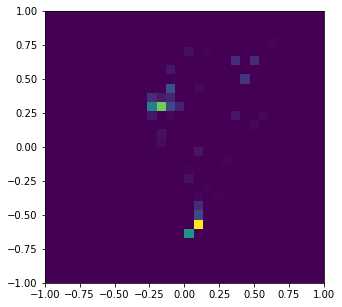

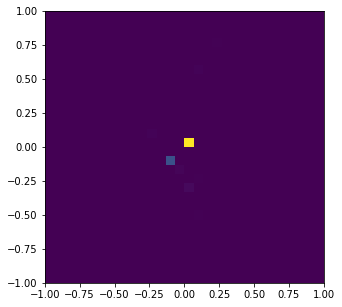

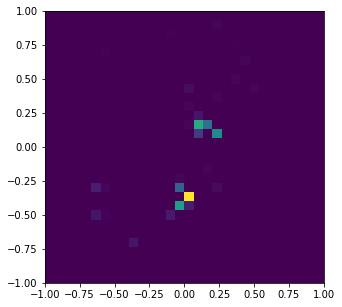

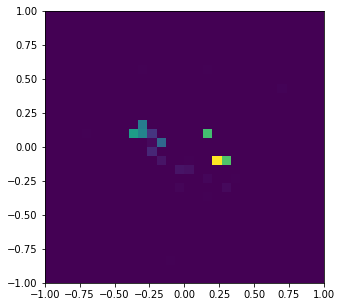

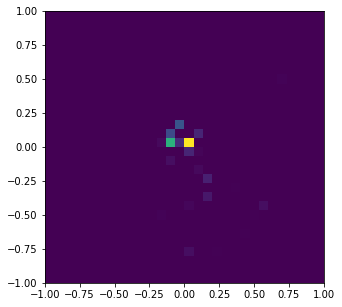

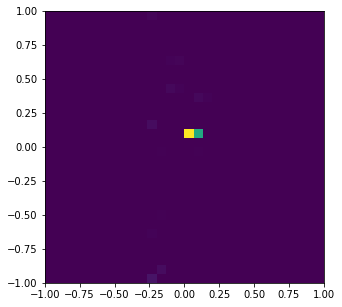

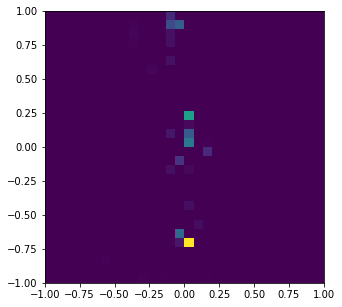

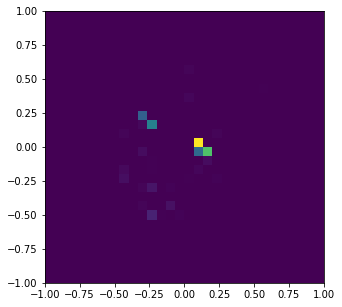

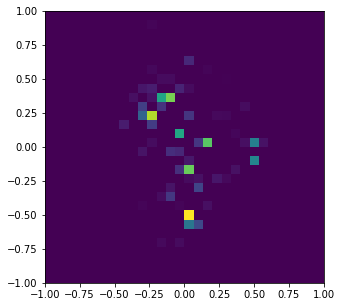

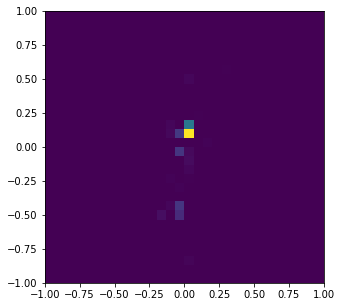

In [304]:
for i in range(10):
    jet = this.sample().values[0,:800].reshape(200,4)
    jet = jet[np.all(jet != 0, axis=1)]
    jet = preprocess_jet(jet)
    lim=1
    plt.figure(figsize=[5,5])
    plt.hist2d(jet[:,2],jet[:,3],weights = jet[:,0],range=[[-lim,lim],[-lim,lim]],bins=30)
    plt.show()

In [96]:
np.sqrt(jetsum[0]**2-np.linalg.norm(jetsum[1:])**2)

136.4436579925801

In [97]:
newjetsum=np.dot(longboostmat,jetsum)
np.sqrt(newjetsum[0]**2-np.linalg.norm(newjetsum[1:])**2)

136.44365799257884

In [98]:
ptlist = np.linalg.norm(row[:,1:3],axis=1)
pabslist = np.linalg.norm(row[:,0,1:],axis=1)
pL = row[:,3]
eta = 0.5*np.log((pabs+pL)/(pabs-pL))

IndexError: too many indices for array

In [34]:
row[0,0]

145.50405883789062

In [77]:
np.arctan2(1.,-1)

2.356194490192345